Importando bibliotecas

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import numpy as np 

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
url = (r'C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\8 - Aprendizado Supervisionado\Country-data.csv')

In [4]:
df = pd.read_csv(url)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df["country"].unique().size

167

In [12]:
# report_df = ProfileReport(df)
# report_df

In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<Axes: >

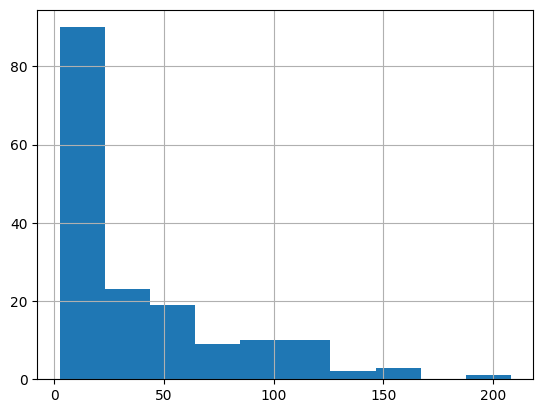

In [7]:
df[df.columns[1]].hist()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

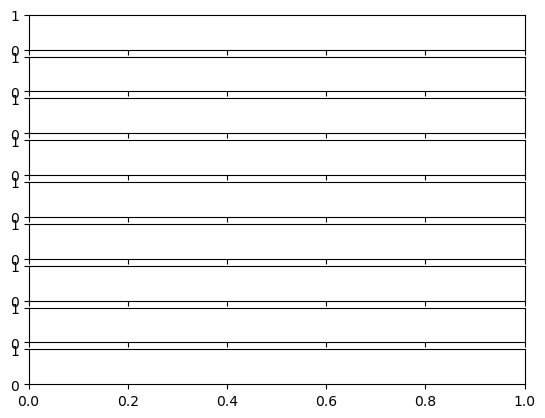

In [6]:
fig, ax = plt.subplots(9, 1, sharex='col', sharey='row')
count = 0
for i in df.columns[1:]:
    df[i].hist(ax=ax[count,1])
    count = count + 1 

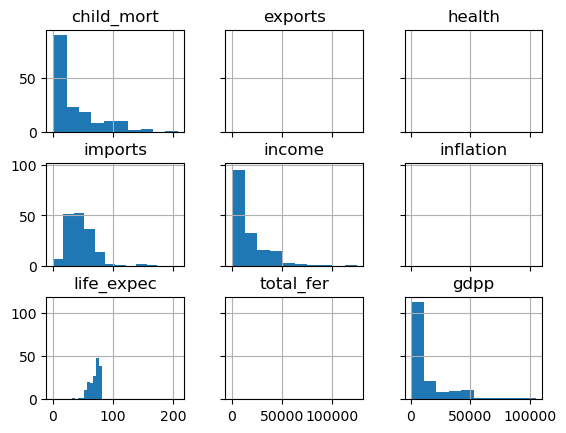

In [7]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row')
m=1
for i in range(3):
    for j in range(3):

        df.hist(column = df.columns[m], ax=ax[i,j], figsize=(40, 36))
        m+=1

In [19]:
df_1 = df[df.columns[1:]]

df_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [20]:
# Padronização dos dados e criando modelo

Scaler = StandardScaler().fit(df_1)

In [23]:
X = Scaler.transform(df_1)

In [25]:
kmeans = KMeans(n_clusters= 3).fit(X)

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [36]:
dist_cent = kmeans.fit_transform(X)

dist_cent

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 3.70748731,  1.0860896 ,  5.78155681],
       [ 0.83703077,  3.602306  ,  3.18403066],
       [ 1.41463189,  3.13222868,  3.74437502],
       [ 4.32361304,  2.26757607,  6.23511527],
       [ 1.06253633,  3.82116699,  2.50034165],
       [ 2.16492481,  3.68835234,  3.58887787],
       [ 1.11510231,  3.41424622,  3.77477065],
       [ 3.57530217,  5.43712616,  2.00759372],
       [ 3.52006029,  5.57865737,  0.94183635],
       [ 1.52274842,  3.06199495,  3.54982035],
       [ 1.68758762,  3.96093688,  1.91068234],
       [ 2.11334893,  4.37206936,  2.02504056],
       [ 1.94460476,  2.86315973,  4.55102662],
       [ 1.24265752,  3.87740564,  2.33528924],
       [ 1.33911565,  3.72752976,  3.2686538 ],
       [ 3.67392313,  5.65987085,  1.37769631],
       [ 1.13272617,  3.23360277,  3.39611964],
       [ 3.53195127,  1.50221812,  5.68556389],
       [ 1.23075706,  2.97804114,  3.70545116],
       [ 1.22191063,  2.33439938,  3.94622882],
       [ 2.12778387,  4.33088434,  3.141

In [31]:
uniq, counts = np.unique(y_kmeans, return_counts= True)

In [32]:
uniq

array([0, 1, 2])

In [33]:
counts

array([84, 36, 47], dtype=int64)

In [34]:
df_1['cluster'] = y_kmeans

df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [35]:
df_1.groupby('cluster').size()

cluster
0    84
1    36
2    47
dtype: int64